<h2><strong>Преобразование Фурье</strong></h2>

Преобразование Фурье – это некий линейный оператор, который преобразует входной сигнал u(t) во временной области (t – это время) в сигнал U(f) в частотной области (f – это частота).

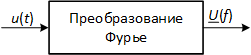

<h3><strong>Виды преобразования Фурье</strong></h3>



Преобразование Фурье подразделяют на категории по нескольким признакам. В первую очередь – по типу функций, с которыми работает преобразование: непрерывные или дискретные.(DFT).

Термины DFT и FFT нередко используются как взаимозаменяемые. Однако это не совсем одно и то же: быстрое преобразование Фурье (FFT) – лишь один из алгоритмов вычисления дискретного преобразования Фурье.





<h3><strong>Зачем может понадобиться преобразование Фурье?</strong></h3>



Преобразование Фурье полезно во многих приложениях. Например, Shazam и другие службы распознавания музыки используют преобразование Фурье для идентификации песен. Алгоритм сжатия JPEG представляет собой вариант преобразования Фурье, применяемый для удаления высокочастотных компонент изображений. В распознавании речи преобразование Фурье и связанные с ним преобразования служат для восстановления произнесенных слов.

Задача преобразования Фурье возникает всякий раз, когда нужно как-либо работать с сигналом, представляемым в пространстве частот.


<h3><strong>Пример: удаление нежелательного шума из аудиофайла</strong></h3>





In [1]:
#Импорт библиотек
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

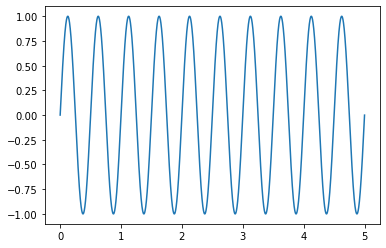

In [3]:
#Создание сигнала
SAMPLE_RATE = 44100  # Гц
DURATION = 5  # Секунды

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x * freq
    # 2pi для преобразования в радианы
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Генерируем волну с частотой 2 Гц, которая длится 5 секунд
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

In [4]:
#cложение сигналов;

_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)

noise_tone = noise_tone * 0.3
mixed_tone = nice_tone + noise_tone

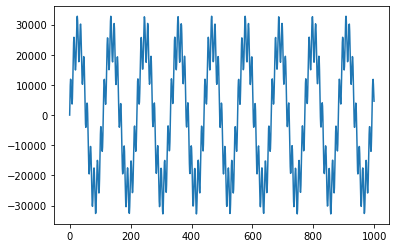

In [5]:
# нормализация, масштабирование сигнала под целевой формат
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()